<a href="https://colab.research.google.com/github/satvikpendem/ZeroToMasteryPyTorchForDeepLearning/blob/main/00_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi
device = "cpu"

if torch.cuda.is_available():
  device = "cuda"
elif torch.backends.mps.is_available():
  device = "mps"

device

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



'cpu'

# Linear Regression

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create learning model
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
# Train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None
                     ):
  
  fig = plt.figure(figsize=(10, 7))
  fig.patch.set_alpha(1.0)

  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

  if predictions is not None:
    # modulus = len(predictions) // 10
    # for i, p in enumerate(predictions):
    #   if i % modulus == 0:
        # plt.scatter(test_data, p, c = np.random.rand(len(test_data), 3), s = 4, label = f"Predictions {p}")
    plt.scatter(test_data, predictions, c="r", s = 4, label = f"Predictions")

  plt.legend(prop={
      "size": 14
  })

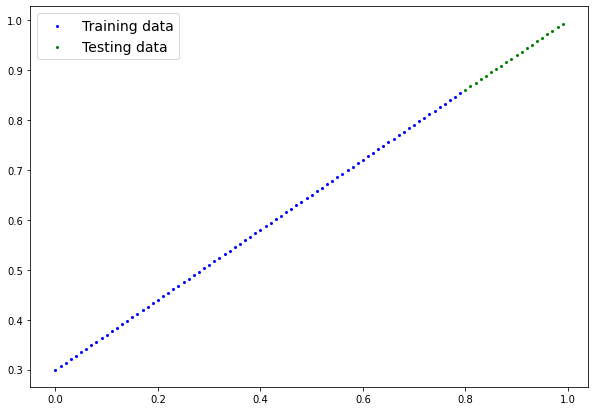

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
  
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
# Initialize with random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

print(list(model_0.parameters()))

print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


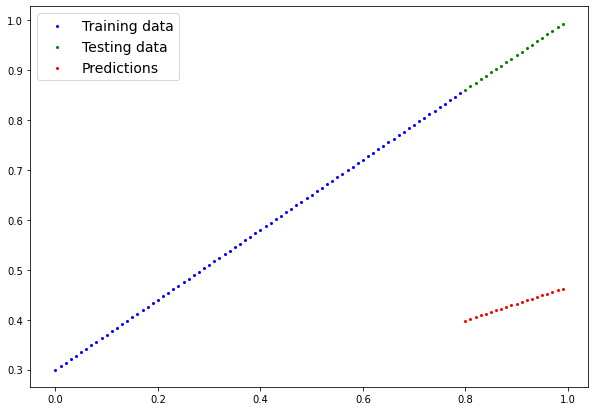

In [ ]:
# Inference with no training done
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [ ]:
# Set up loss function
loss_fn = nn.MSELoss()

# Set up optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [ ]:
# Train
epochs = 10000

losses = []

for epoch in range(epochs):

  # Set model to training mode
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Calculate loss
  loss = loss_fn(y_pred, y_train)

  losses.append(loss.detach().numpy())

  # Optimizer zero grad
  # Make optimizer's gradient to be zero so as to not accumulate gradient
  # in each loop
  optimizer.zero_grad()

  # Perform backpropagation
  loss.backward()

  # Perform gradient descent
  optimizer.step()

  model_0.eval()

  

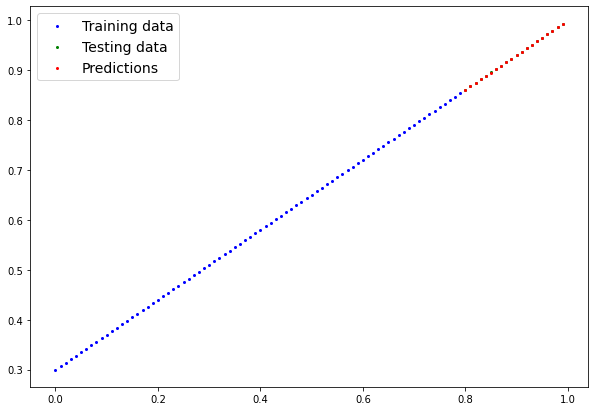

In [ ]:
# Inference with no training done
with torch.inference_mode():
  predictions = model_0(X_test)

plot_predictions(predictions = predictions)


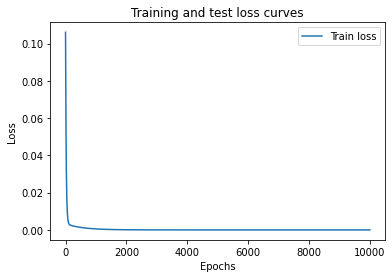

In [ ]:
# Plot the loss curves
fig = plt.figure()
fig.patch.set_alpha(1.0)

plt.plot(range(0, epochs), losses, label="Train loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()